# Global Pandemie Corona (COVID-19) Analysis

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

First Identified: December 2019 in Wuhan, the capital of Hubei province, China.
Most common symptoms:fever.dry cough.tiredness.
Less common symptoms:aches and pains.sore throat.diarrhoea.conjunctivitis.headache.loss of taste or smell.
Risk factors: Travel, Viral Exposure.
Prevention: Hand Washing, Face Coverings, Quarantine, Social Distancing.
More Info:https://www.who.int/health-topics/coronavirus#tab=tab_1

***Important notice: the data updates occur normaly according to the different time-zones. For example, if you are in europe and you run the codes, you may face Nan values for USA. If you want to see the results properly, you may regurarly update the blocks.

# Content

1. Importing data
2. Exploratory Data Analysis (EDA) and Feature Engineering
3. Feature engineering
4. Modeling & Evaluation

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
#sns.set_palette(sns.xkcd_palette(sample_colors))
import warnings
warnings.filterwarnings("ignore")

In [2]:
#defining this block of function is fully arbitrary. The information can be achieved seperately
def my_df_summary(data):
    '''Summarizing Function'''
    try:
        dat = data.copy()
        df = pd.DataFrame([dat.min(), dat.max(), dat.mean(), dat.std(), dat.isna().sum(), dat.nunique(), dat.dtypes],
                     index=['Minimum', 'Maximum', 'Mean', 'Std','#NA', '#Uniques', 'dtypes'])        
        return df
    except:
        print('No Summary.')
        return data  

In [3]:
#setting up the configuration of plots

plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=12)   # fontsize of the figure title
plt.rc('lines', linewidth=10, color='r')
plt.rcParams['figure.figsize']=(16,8)
Set1=['Red', 'Yellow', 'Navy', 'pink','purple','black','Blue']

# 1. Importing Data

In [4]:
# df = pd.read_csv('.csv', sep=';', header=None)

corona = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
corona.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-04-21 11:20:58,33.93911,67.709953,58037.0,2549.0,52301.0,3187.0,149.086754,NaN,NaN,4.392026,4,AFG
1,Albania,2021-04-21 11:20:58,41.15330,20.168300,129842.0,2353.0,102601.0,24888.0,4511.849329,NaN,NaN,1.812203,8,ALB
2,Algeria,2021-04-21 11:20:58,28.03390,1.659600,119992.0,3165.0,83636.0,33191.0,273.635453,NaN,NaN,2.637676,12,DZA
3,Andorra,2021-04-21 11:20:58,42.50630,1.521800,12874.0,123.0,12285.0,466.0,16662.136802,NaN,NaN,0.955414,20,AND
4,Angola,2021-04-21 11:20:58,-11.20270,17.873900,24661.0,565.0,22647.0,1449.0,75.034379,NaN,NaN,2.291067,24,AGO
5,Antigua and Barbuda,2021-04-21 11:20:58,17.06080,-61.796400,1217.0,31.0,995.0,191.0,1242.749775,NaN,NaN,2.547247,28,ATG
6,Argentina,2021-04-21 11:20:58,-38.41610,-63.616700,2743620.0,59792.0,2407853.0,275975.0,6070.522916,NaN,NaN,2.179311,32,ARG
7,Armenia,2021-04-21 11:20:58,40.06910,45.038200,210518.0,3944.0,190271.0,16303.0,7104.332631,NaN,NaN,1.873474,51,ARM
8,Australia,2021-04-21 11:20:58,-25.00000,133.000000,29578.0,910.0,23178.0,5490.0,116.175760,NaN,NaN,3.076611,36,AUS
9,Austria,2021-04-21 11:20:58,47.51620,14.550100,600089.0,9997.0,563256.0,26836.0,6662.917481,NaN,NaN,1.665920,40,AUT


# 2. Exploratory Data Analysis (EDA) and Feature Engineering

In [5]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
Country_Region         192 non-null object
Last_Update            192 non-null object
Lat                    190 non-null float64
Long_                  190 non-null float64
Confirmed              192 non-null float64
Deaths                 192 non-null float64
Recovered              188 non-null float64
Active                 191 non-null float64
Incident_Rate          190 non-null float64
People_Tested          0 non-null float64
People_Hospitalized    0 non-null float64
Mortality_Rate         192 non-null float64
UID                    192 non-null int64
ISO3                   190 non-null object
dtypes: float64(10), int64(1), object(3)
memory usage: 21.1+ KB


In [6]:
#cleaning process
#deleting the columns with NAN values
corona1=corona.dropna(how='all', axis=1)
#corona.drop(['People_Hospitalized'], axis=1)

In [7]:
corona1.head(10)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-04-21 11:20:58,33.93911,67.709953,58037.0,2549.0,52301.0,3187.0,149.086754,4.392026,4,AFG
1,Albania,2021-04-21 11:20:58,41.15330,20.168300,129842.0,2353.0,102601.0,24888.0,4511.849329,1.812203,8,ALB
2,Algeria,2021-04-21 11:20:58,28.03390,1.659600,119992.0,3165.0,83636.0,33191.0,273.635453,2.637676,12,DZA
3,Andorra,2021-04-21 11:20:58,42.50630,1.521800,12874.0,123.0,12285.0,466.0,16662.136802,0.955414,20,AND
4,Angola,2021-04-21 11:20:58,-11.20270,17.873900,24661.0,565.0,22647.0,1449.0,75.034379,2.291067,24,AGO
5,Antigua and Barbuda,2021-04-21 11:20:58,17.06080,-61.796400,1217.0,31.0,995.0,191.0,1242.749775,2.547247,28,ATG
6,Argentina,2021-04-21 11:20:58,-38.41610,-63.616700,2743620.0,59792.0,2407853.0,275975.0,6070.522916,2.179311,32,ARG
7,Armenia,2021-04-21 11:20:58,40.06910,45.038200,210518.0,3944.0,190271.0,16303.0,7104.332631,1.873474,51,ARM
8,Australia,2021-04-21 11:20:58,-25.00000,133.000000,29578.0,910.0,23178.0,5490.0,116.175760,3.076611,36,AUS
9,Austria,2021-04-21 11:20:58,47.51620,14.550100,600089.0,9997.0,563256.0,26836.0,6662.917481,1.665920,40,AUT


In [8]:
#statistical analysis
corona1.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID
count,190.000000,190.000000,1.920000e+02,192.000000,1.880000e+02,1.910000e+02,190.000000,192.000000,192.000000
mean,19.515850,19.770528,7.450629e+05,15869.119792,4.362081e+05,1.409654e+05,2950.872159,2.037919,518.145833
std,23.914666,62.027648,2.837782e+06,55896.604353,1.451061e+06,5.730954e+05,3496.009304,2.361985,953.673240
min,-40.900600,-172.104600,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.824679,0.000000,4.000000
25%,4.643279,-6.706225,9.765000e+03,122.500000,6.815250e+03,4.590000e+02,166.774449,0.990178,207.000000
50%,17.589241,20.535638,8.929650e+04,1123.500000,4.915050e+04,5.189000e+03,1396.212770,1.649617,424.000000
75%,40.383525,46.701734,3.462412e+05,6730.500000,2.452078e+05,3.433450e+04,5259.743988,2.524551,649.250000
max,64.963100,178.065000,3.179372e+07,568475.000000,1.327604e+07,4.968803e+06,16662.136802,22.222222,9999.000000


In [9]:
my_df_summary(corona1)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
Minimum,Afghanistan,2021-04-21 11:20:58,-40.9006,-172.105,1,0,1,0,0.824679,0,4,NaN
Maximum,Zimbabwe,2021-04-21 11:20:58,64.9631,178.065,3.17937e+07,568475,1.3276e+07,4.9688e+06,16662.1,22.2222,9999,NaN
Mean,NaN,NaN,19.5158,19.7705,745063,15869.1,436208,140965,2950.87,2.03792,518.146,NaN
Std,NaN,NaN,23.9147,62.0276,2.83778e+06,55896.6,1.45106e+06,573095,3496.01,2.36199,953.673,NaN
#NA,0,0,2,2,0,0,4,1,2,0,0,2
#Uniques,192,1,190,190,191,172,186,181,190,184,192,190
dtypes,object,object,float64,float64,float64,float64,float64,float64,float64,float64,int64,object


In [10]:
#where there are still m issing entries
corona1.isna().sum()

Country_Region    0
Last_Update       0
Lat               2
Long_             2
Confirmed         0
Deaths            0
Recovered         4
Active            1
Incident_Rate     2
Mortality_Rate    0
UID               0
ISO3              2
dtype: int64

In [11]:
#name of columns
corona1.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate', 'UID',
       'ISO3'],
      dtype='object')

In [12]:
#number of involved countries
corona1['Country_Region'].count()

192

In [13]:
# list of countries
list(corona1['Country_Region'])

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [14]:
corona1['Deaths'].sum()

3046871.0

In [15]:
corona1['Deaths'].count()

192

In [16]:
corona1['Recovered'].count()

188

In [17]:
corona1['Recovered'].sum()

82007128.0

In [18]:
Total_confirmed=corona1['Confirmed'].sum()
print('\nGlobal Confirmed Cases from Corona Infection:\n{}\n'.format(Total_confirmed))


Global Confirmed Cases from Corona Infection:
143052070.0



In [19]:
#Global Death
Total_death=corona1['Deaths'].sum()
print('\nGlobal Death from Corona Infection:\n{}\n'.format(Total_death))


Global Death from Corona Infection:
3046871.0



In [20]:
##Conditional search of columns

corona1.loc[(corona1['Recovered']>100000) & (corona1['Recovered']<150000) , ['Country_Region', 'Recovered']]

,Country_Region,Recovered
1,Albania,102601.0
21,Bosnia and Herzegovina,149273.0
27,Burma,131908.0
57,Estonia,104653.0
90,Kenya,103838.0
91,"Korea, South",105877.0
96,Latvia,102596.0
129,North Macedonia,124828.0
183,Uruguay,139590.0


In [21]:
###Conditional search of columns
corona1.loc[(corona1['Recovered']>100000) & (corona1['Deaths']<1000) & (corona1['Confirmed']>1000), ['Confirmed','Country_Region', 'Recovered', 'Deaths']]

,Confirmed,Country_Region,Recovered,Deaths
12,166157.0,Bahrain,154711.0,605.0
140,198361.0,Qatar,175431.0,391.0


In [22]:
#where no dead is reported
no_dead_countries=list(corona1.loc[corona1['Deaths'] == 0, 'Country_Region'])
print('{} ountries as listed reported NO DEATH!:\n{}\n'.format(len(no_dead_countries),no_dead_countries))


9 ountries as listed reported NO DEATH!:
['Dominica', 'Holy See', 'Laos', 'Marshall Islands', 'Micronesia', 'Saint Kitts and Nevis', 'Samoa', 'Solomon Islands', 'Vanuatu']



In [23]:
#most_dead_country=corona1.loc[corona1['Deaths'] == corona1['Deaths'].max()]
most_dead_country=corona1.loc[corona1['Deaths'] == corona1['Deaths'].max() , 'Country_Region']
most_dead_country

178    US
Name: Country_Region, dtype: object

In [24]:
#The country with the most dead
most_dead_country=list(corona1.loc[corona1['Deaths'] == corona1['Deaths'].max() , 'Country_Region'])
most_dead_country
print('{} reported the most dead from with total of Corona Death {}'.format(most_dead_country, corona1['Deaths'].max()))

['US'] reported the most dead from with total of Corona Death 568475.0


In [25]:
confirmed_US=corona1.loc[corona1['Country_Region'] == 'US' , 'Confirmed']
A=confirmed_US/Total_confirmed*100

In [26]:
#finding No. of Dead Cases in US
corona1.loc[corona1.Country_Region == 'US','Deaths']

178    568475.0
Name: Deaths, dtype: float64

In [27]:
#finding No. of Recovered Cases in US
corona1.loc[corona1.Country_Region == 'US',  'Recovered'] 

178   NaN
Name: Recovered, dtype: float64

In [28]:
#find Germany Row
corona1.loc[corona1.Country_Region == 'Germany']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
66,Germany,2021-04-21 11:20:58,51.165691,10.451526,3198534.0,80688.0,2831480.0,286366.0,3817.597751,2.522656,276,DEU


In [29]:
#the same as above
corona1.loc[corona1['Country_Region']=='Germany']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
66,Germany,2021-04-21 11:20:58,51.165691,10.451526,3198534.0,80688.0,2831480.0,286366.0,3817.597751,2.522656,276,DEU


In [30]:
corona1.ix[corona1['Country_Region']=='Germany']

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
66,Germany,2021-04-21 11:20:58,51.165691,10.451526,3198534.0,80688.0,2831480.0,286366.0,3817.597751,2.522656,276,DEU


# 3. Feature engineering

Let's first sort them acc. to death rate (decreasing).

In [31]:
#Ranking the table based on the number of deads
sort_by_death = corona1.sort_values('Deaths',ascending=False)
sort_by_death.head(3)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID,ISO3
178,US,2021-04-21 11:20:58,40.0000,-100.0000,31793715.0,568475.0,NaN,NaN,9650.066377,1.788011,840,USA
23,Brazil,2021-04-21 11:20:58,-14.2350,-51.9253,14043076.0,378003.0,12425791.0,1239282.0,6606.659318,2.691739,76,BRA
114,Mexico,2021-04-21 11:20:58,23.6345,-102.5528,2311172.0,213048.0,1765244.0,332880.0,1808.537958,9.218180,484,MEX


In [32]:
#In order to get a better statistical overview, I have added the percentage columns to the table and did a little bit graphical improvement:
sort_by_death['Death_Rate'] = sort_by_death['Deaths'] / sort_by_death['Confirmed'] * 100
sort_by_death['Recovery_Rate'] = sort_by_death['Recovered'] / sort_by_death['Confirmed'] * 100
sort_by_death['Incident_Rate'].fillna(0, inplace=True)
sort_by_death['Confirmed_percentage']=sort_by_death['Confirmed'] / Total_confirmed * 100

sort_by_death.drop(['Last_Update', 'Lat', 'Long_', 'UID', 'ISO3', 'Mortality_Rate'], axis=1).head(11)\
.style.hide_index()\
.background_gradient(cmap='Blues',subset=["Confirmed"])\
.background_gradient(cmap='Reds',subset=["Deaths"])\
.background_gradient(cmap='Greens',subset=["Recovered"])\
.background_gradient(cmap='Purples',subset=["Active"])\
.background_gradient(cmap='GnBu',subset=["Incident_Rate"])\
.background_gradient(cmap='OrRd',subset=["Death_Rate"])\
.background_gradient(cmap='PuBu',subset=["Recovery_Rate"])\
.background_gradient(cmap='Blues',subset=["Confirmed_percentage"])\



Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,Death_Rate,Recovery_Rate,Confirmed_percentage
US,3.17937e+07,568475,nan,nan,9650.07,1.78801,nan,22.2253
Brazil,1.40431e+07,378003,1.24258e+07,1.23928e+06,6606.66,2.69174,88.4834,9.81676
Mexico,2.31117e+06,213048,1.76524e+06,332880,1808.54,9.21818,76.3787,1.61562
India,1.56161e+07,182553,1.3276e+07,2.15754e+06,1131.6,1.169,85.0149,10.9164
United Kingdom,4.40864e+06,127557,14054,4.26703e+06,6494.19,2.89334,0.318783,3.08185
Italy,3.89106e+06,117633,3.29072e+06,482715,6435.57,3.02316,84.5711,2.72003
Russia,4.6737e+06,104937,4.30338e+06,265386,3202.6,2.24527,92.0764,3.26713
France,5.40131e+06,101713,330790,4.9688e+06,8274.88,1.88312,6.12426,3.77576
Germany,3.19853e+06,80688,2.83148e+06,286366,3817.6,2.52266,88.5243,2.23592
Spain,3.42835e+06,77102,150376,3.35862e+06,7332.63,2.24895,4.38624,2.39658


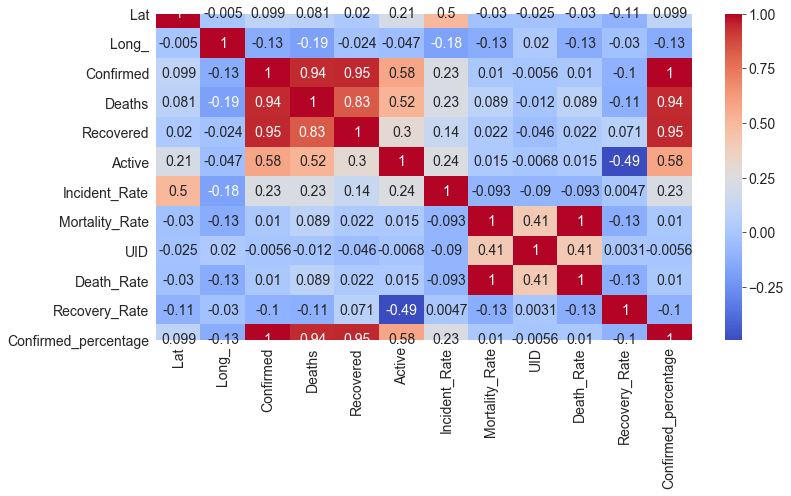

In [33]:
#Heat Map shows us how the columns can be related to each other. 
sort_by_death.iloc[:,:].corr();
plt.figure(figsize=(12,6))
sns.heatmap(sort_by_death.corr(),cmap='coolwarm',annot=True)
plt.show()

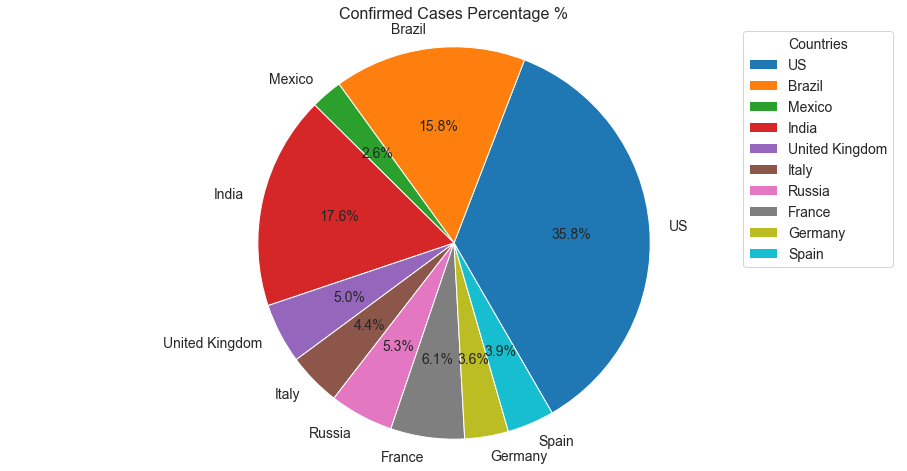

In [34]:
#confirmed cases percentages per Country
explodeTuple = (0.1, 1.0, 1.0, 0.0, 0.0, 0.0,0.0,.0,0.0,0.0)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Confirmed_percentage[0:10]

# Plot
plt.pie(sizes, labels=labels, 
        #explode=explodeTuple,
        autopct='%0.1f%%', 
        #shadow=True, 
        startangle=-60,
       )

plt.title("Confirmed Cases Percentage %")
plt.axis('equal')
plt.legend(title="Countries", loc="best")
plt.show()

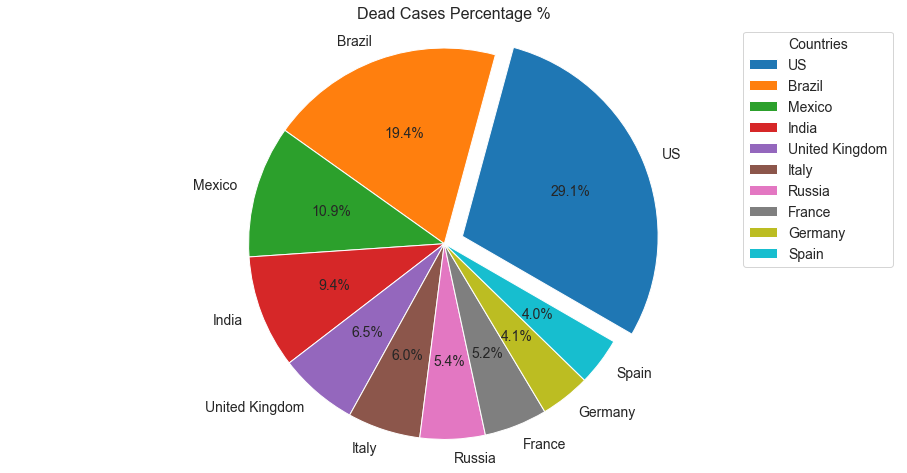

In [35]:
#Dead Cases Percentages per Country-Top 10
explodeTuple = (0.1,0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0,0.0)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Deaths[0:10]


# Plot
plt.pie(sizes, labels=labels, 
        explode=explodeTuple,
        #labels=pieLabels,
        autopct='%0.1f%%', 
        #shadow=True, 
        startangle=-30,
       )

plt.title("Dead Cases Percentage %")
plt.axis('equal')
plt.legend(title="Countries", loc="best")
plt.show()

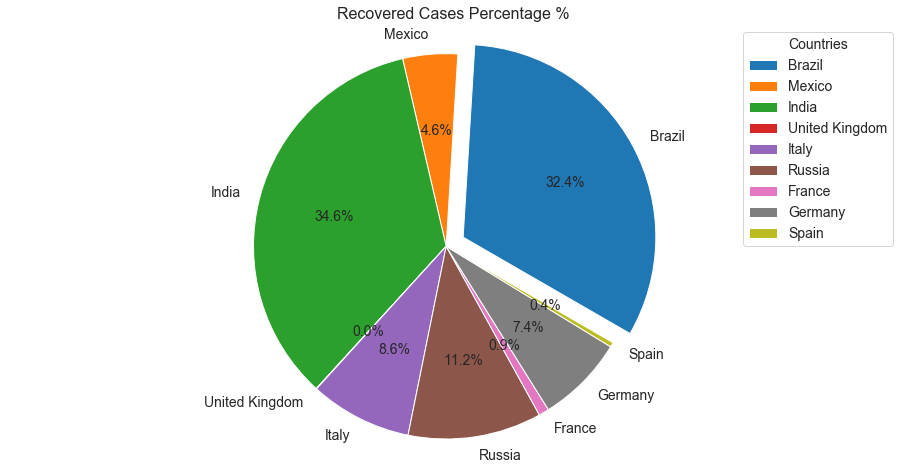

In [36]:
#Recovered Cases Percentages per Country-To 10
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0)
labels = sort_by_death.Country_Region[1:10]
sizes = sort_by_death.Recovered[1:10]

# Plot
plt.pie(sizes, labels=labels, 
        explode=explodeTuple,
        #labels=pieLabels,
        autopct='%0.1f%%', 
        #shadow=True, 
        startangle=-30)

plt.title("Recovered Cases Percentage %")
plt.axis('equal')
plt.legend(title="Countries", loc="best")
plt.show()

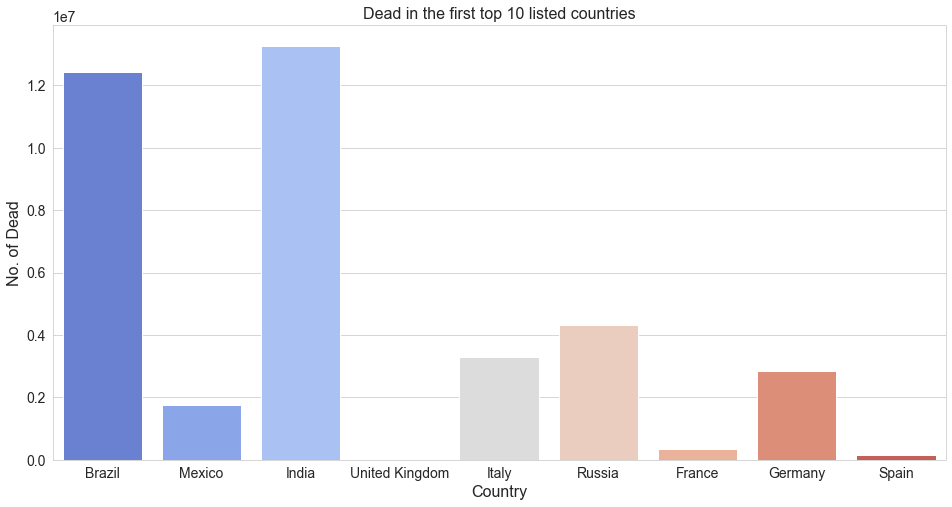

In [37]:
##Plotting the total number of deads (the first 10 countries of the table)
sns.barplot(x=labels, y=sizes, errwidth=2, data=corona1, palette="coolwarm").set(title = 'Dead in the first top 10 listed countries', xlabel = 'Country', ylabel = 'No. of Dead' )
plt.show()

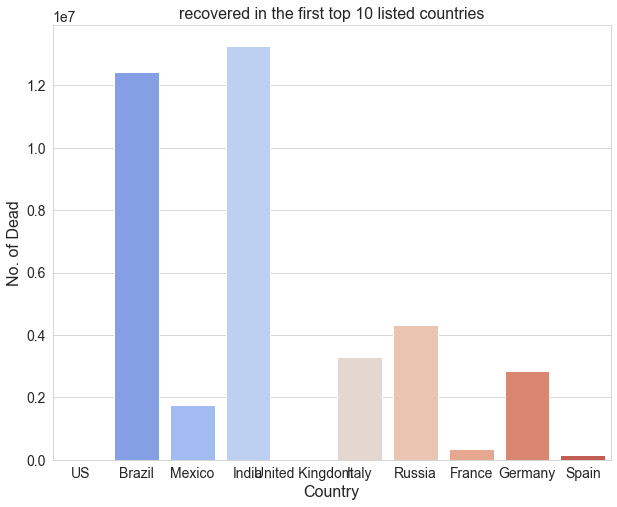

In [38]:
##Plotting the total number of recovered (the first 10 countries of the table)
plt.rcParams['figure.figsize']=(10,8)
labels = sort_by_death.Country_Region[0:10]
sizes = sort_by_death.Recovered[0:10]
sns.barplot(x=labels, y=sizes, errwidth=2, data=corona1, palette="coolwarm").set(title = 'recovered in the first top 10 listed countries', xlabel = 'Country', ylabel = 'No. of Dead' )
plt.show()

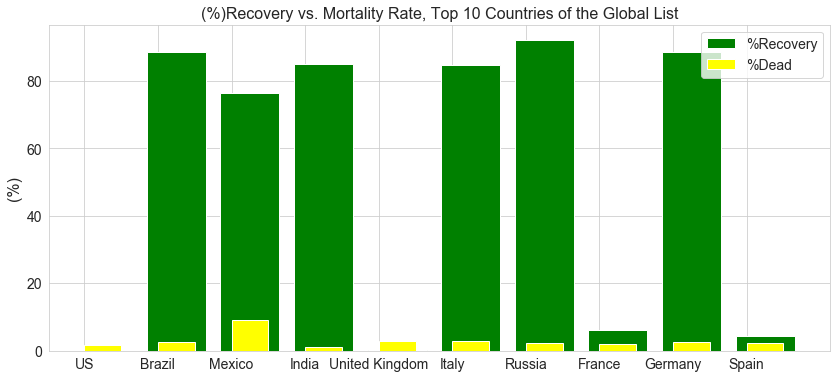

In [39]:
###Plotting the total number of deads vs. total recovery (the first 10 countries of the table)
plt.rcParams['figure.figsize'] = [14, 6]
divisions = list(sort_by_death.Country_Region[0:10])
#Confirmed=sort_by_death.Confirmed[0:10]
Deads = sort_by_death.Death_Rate[0:10]
Recovery = sort_by_death.Recovery_Rate[0:10]

index = np.arange(10)
width = 0.5

#plt.bar(index, Confirmed, color='Red', label="%Confirmed")
plt.bar(index+width, Recovery, color='Green', label="%Recovery")
plt.bar(index+width, Deads, width, color='Yellow', label="%Dead")

plt.title("(%)Recovery vs. Mortality Rate, Top 10 Countries of the Global List")
#plt.xlabel("Countries")
plt.ylabel("(%)")
plt.xticks(index+width/2, divisions)
        
plt.legend(loc='best')        
plt.show()

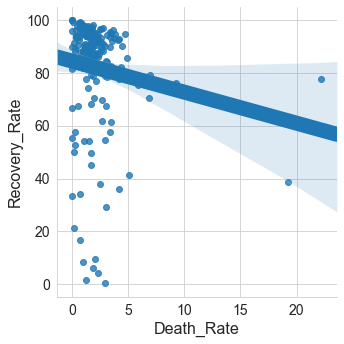

In [40]:
# LMplot 
sns.lmplot(x="Death_Rate", y="Recovery_Rate", data=sort_by_death)
plt.show()

# Time Serie Analysis

Daily report since beginning of the Pandemy in all countiries and updated up to today.

In [41]:
corona_cases_time = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv", parse_dates = ['Last_Update','Report_Date_String'])
corona_cases_time.head(10)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String,Delta_Deaths
0,Afghanistan,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-22,0.0
1,Afghanistan,2020-01-23,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-23,0.0
2,Afghanistan,2020-01-24,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-24,0.0
3,Afghanistan,2020-01-25,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-25,0.0
4,Afghanistan,2020-01-26,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-26,0.0
5,Afghanistan,2020-01-27,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-27,0.0
6,Afghanistan,2020-01-28,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-28,0.0
7,Afghanistan,2020-01-29,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-29,0.0
8,Afghanistan,2020-01-30,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-30,0.0
9,Afghanistan,2020-01-31,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,4,AFG,2020-01-31,0.0


In [42]:
corona_cases_time.describe()

,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,FIPS,UID,Delta_Deaths
count,1.137500e+05,113750.000000,0.0,0.0,113631.000000,0.0,1.114750e+05,0.0,0.0,26390.000000,1.137500e+05,113545.000000
mean,2.184983e+05,5240.808167,NaN,NaN,1539.476481,NaN,1.554548e+05,NaN,NaN,3288.086207,1.780917e+07,31.855229
std,1.181398e+06,24279.657182,NaN,NaN,8384.188066,NaN,9.466685e+05,NaN,NaN,17257.953086,3.433430e+07,152.470618
min,0.000000e+00,0.000000,NaN,NaN,0.000000,NaN,0.000000e+00,NaN,NaN,1.000000,4.000000e+00,0.000000
25%,2.440000e+02,3.000000,NaN,NaN,0.000000,NaN,8.887906e+00,NaN,NaN,18.000000,2.660000e+02,0.000000
50%,7.711000e+03,133.000000,NaN,NaN,56.000000,NaN,1.779967e+02,NaN,NaN,32.500000,5.510000e+02,0.000000
75%,9.362175e+04,1842.000000,NaN,NaN,646.000000,NaN,2.745460e+03,NaN,NaN,48.000000,8.500000e+02,10.000000
max,3.179264e+07,568470.000000,NaN,NaN,823225.000000,NaN,2.415449e+07,NaN,NaN,99999.000000,8.410000e+07,4474.000000


In [43]:
corona_cases_time.describe()

,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,FIPS,UID,Delta_Deaths
count,1.137500e+05,113750.000000,0.0,0.0,113631.000000,0.0,1.114750e+05,0.0,0.0,26390.000000,1.137500e+05,113545.000000
mean,2.184983e+05,5240.808167,NaN,NaN,1539.476481,NaN,1.554548e+05,NaN,NaN,3288.086207,1.780917e+07,31.855229
std,1.181398e+06,24279.657182,NaN,NaN,8384.188066,NaN,9.466685e+05,NaN,NaN,17257.953086,3.433430e+07,152.470618
min,0.000000e+00,0.000000,NaN,NaN,0.000000,NaN,0.000000e+00,NaN,NaN,1.000000,4.000000e+00,0.000000
25%,2.440000e+02,3.000000,NaN,NaN,0.000000,NaN,8.887906e+00,NaN,NaN,18.000000,2.660000e+02,0.000000
50%,7.711000e+03,133.000000,NaN,NaN,56.000000,NaN,1.779967e+02,NaN,NaN,32.500000,5.510000e+02,0.000000
75%,9.362175e+04,1842.000000,NaN,NaN,646.000000,NaN,2.745460e+03,NaN,NaN,48.000000,8.500000e+02,10.000000
max,3.179264e+07,568470.000000,NaN,NaN,823225.000000,NaN,2.415449e+07,NaN,NaN,99999.000000,8.410000e+07,4474.000000


In [44]:
print ('Last update: ' + str(corona_cases_time.Last_Update.max()))

Last update: 2021-04-20 00:00:00


In [45]:
#updating the table by the latest date
corona_time=corona_cases_time.sort_values('Last_Update',ascending=False)

In [46]:
#the last 4 rows
corona_time.tail(4)

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String,Delta_Deaths
72800,South Africa,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,710,ZAF,2020-01-22,0.0
72345,Somalia,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,706,SOM,2020-01-22,0.0
71890,Solomon Islands,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,90,SLB,2020-01-22,0.0
56875,New Zealand,2020-01-22,0,0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,554,NZL,2020-01-22,0.0


In [47]:
#cleaning
corona_time = corona_time.drop(['People_Tested','People_Hospitalized', 'Province_State','iso3','FIPS', 'Recovered', 'Active','Delta_Recovered'], axis=1)
corona_time = corona_time.rename(columns={
    'ObservationDate': 'Date', 
    'Country/Region': 'Country_Region', 
    'Province/State': 'Province_State'
})
corona_time.head(2)

,Country_Region,Last_Update,Confirmed,Deaths,Delta_Confirmed,Incident_Rate,UID,Report_Date_String,Delta_Deaths
113749,US,2021-04-20,57456,705,78.0,829449.978346,84000056,2021-04-20,2.0
101009,US,2021-04-20,584983,9049,657.0,194620.661663,84000029,2021-04-20,39.0


In [48]:
#the first and last recorde
(corona_time.Last_Update.min(),corona_time.Last_Update.max())

(Timestamp('2020-01-22 00:00:00'), Timestamp('2021-04-20 00:00:00'))

In [49]:
corona_time.shape

(113750, 9)

In [50]:
#calling the function my_df_summary() to summarize the time-serie records
my_df_summary(corona_time)

,Country_Region,Last_Update,Confirmed,Deaths,Delta_Confirmed,Incident_Rate,UID,Report_Date_String,Delta_Deaths
Minimum,Afghanistan,2020-01-22 00:00:00,0,0,0,0,4,2020-01-22 00:00:00,0
Maximum,Zimbabwe,2021-04-20 00:00:00,31792636,568470,823225,2.41545e+07,84099999,2021-04-20 00:00:00,4474
Mean,NaN,NaN,218498,5240.81,1539.48,155455,1.78092e+07,NaN,31.8552
Std,NaN,NaN,1.1814e+06,24279.7,8384.19,946668,3.43343e+07,NaN,152.471
#NA,0,0,0,0,119,2275,0,0,205
#Uniques,192,455,55097,17537,10132,80947,250,455,1343
dtypes,object,datetime64[ns],int64,int64,float64,float64,int64,datetime64[ns],float64


# line plot of the full time series 

In [51]:
corona_time_1 = corona_time.copy().set_index('Last_Update')
corona_time_1.head(10)

,Country_Region,Confirmed,Deaths,Delta_Confirmed,Incident_Rate,UID,Report_Date_String,Delta_Deaths
Last_Update,,,,,,,,
2021-04-20,US,57456,705,78.0,829449.978346,84000056,2021-04-20,2.0
2021-04-20,US,584983,9049,657.0,194620.661663,84000029,2021-04-20,39.0
2021-04-20,Liberia,2042,85,0.0,40.374267,430,2021-04-20,0.0
2021-04-20,US,983875,25206,2839.0,934647.135380,84000034,2021-04-20,45.0
2021-04-20,US,855155,17193,702.0,400003.274287,84000004,2021-04-20,40.0
2021-04-20,US,162,2,0.0,293.776295,580,2021-04-20,0.0
2021-04-20,Cuba,95754,538,1183.0,845.389303,192,2021-04-20,7.0
2021-04-20,Iceland,6350,29,21.0,1860.805861,352,2021-04-20,0.0
2021-04-20,Papua New Guinea,9952,91,0.0,111.232480,598,2021-04-20,0.0


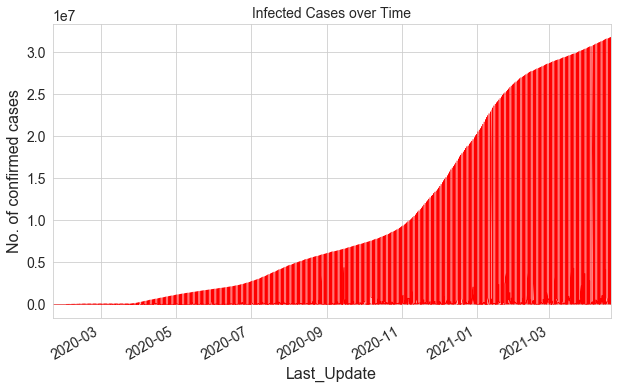

In [52]:
plt.rcParams['figure.figsize']=(10,6)
corona_time_1['Confirmed'].plot(linewidth=0.5, color='red');
plt.title('Infected Cases over Time', size=14)
plt.ylabel('No. of confirmed cases')
plt.show()

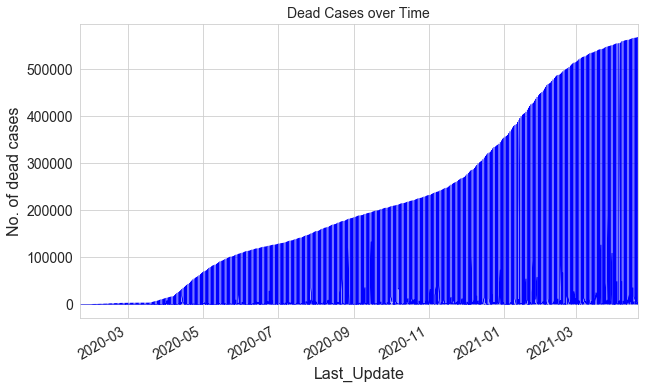

In [53]:
plt.rcParams['figure.figsize']=(10,6)

corona_time_1['Deaths'].plot(linewidth=0.5, color='blue');
plt.title('Dead Cases over Time', size=14)
plt.ylabel('No. of dead cases')
plt.show()

In [54]:
type(corona_time_1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [55]:
#corona_time['Recovered']
#corona_time['Recovered'] = corona_time['Recovered'].fillna(0)
#corona_time['Recovered']

In [56]:
ref_date='2021-04-01'

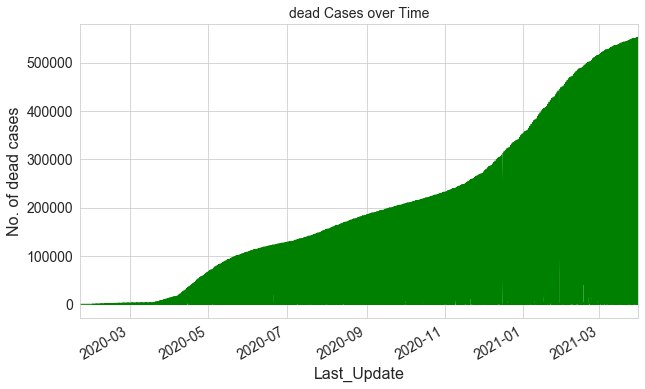

In [57]:
plt.rcParams['figure.figsize']=(10,6)

corona_time_1.loc[corona_time_1.index < ref_date, 'Deaths'].plot(linewidth=1, color='green');
plt.title('dead Cases over Time', size=14)
plt.ylabel('No. of dead cases')
plt.show()

In [58]:
len(corona_time_1)

113750

In [59]:
#fig, axs = plt.subplots(3, 1)
#corona_time.loc[corona_time.index < ref_date, 'Confirmed'].plot(linewidth=1, ax=axs[0], color='green');
#corona_time.loc[corona_time.index < ref_date, 'Recovered'].plot(linewidth=1, ax=axs[1], color='blue');
#corona_time.loc[corona_time.index < ref_date, 'Deaths'].plot(linewidth=1, ax=axs[2], color='red');
#plt.title('dead Cases over Time', size=10)
#plt.ylabel('No. of dead cases')
#plt.show()

# Scatter plot of the full time series 

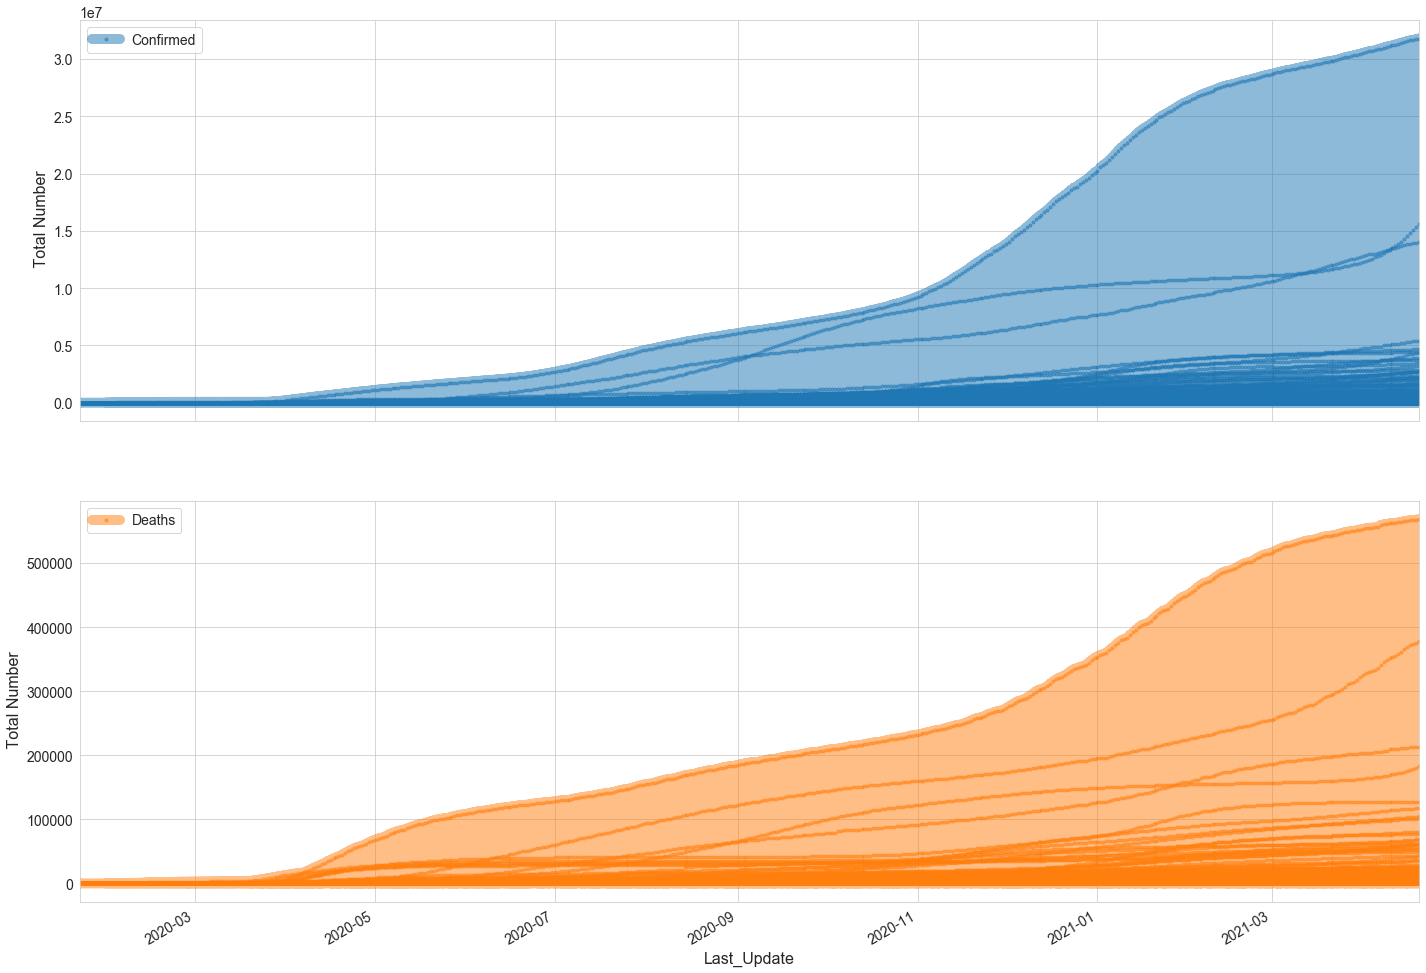

In [60]:
plt.rc('font', size=20)  
cols_plot = ['Confirmed', 'Deaths']
axes = corona_time_1[cols_plot].plot(marker='.', alpha=0.5, #linestyle='None', 
                                  figsize=(24, 18), subplots=True)
for ax in axes:
    ax.set_ylabel(' Total Number')
plt.show()

# Regression

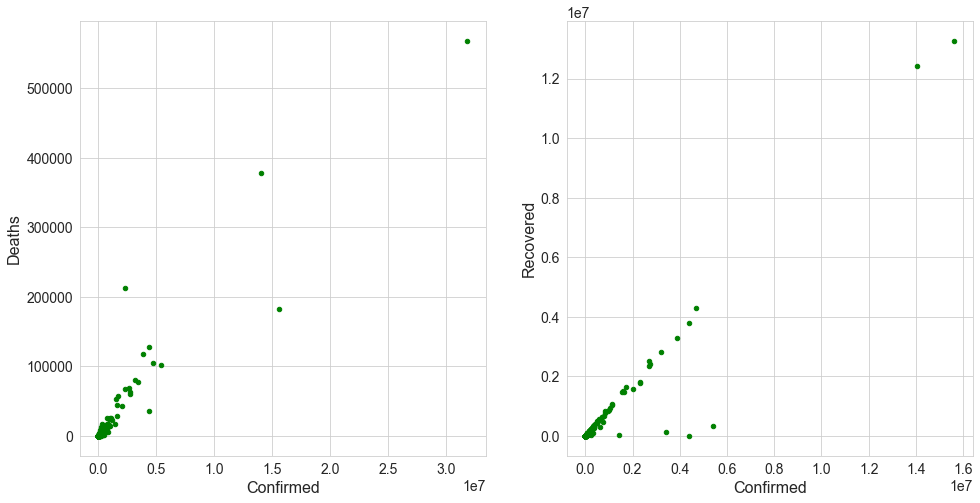

In [61]:
plt.rcParams['figure.figsize']=(16,8)
fig, axs = plt.subplots(1, 2)
sort_by_death.plot(kind='scatter', y='Deaths', x='Confirmed', ax=axs[0], colors='green')
sort_by_death.plot(kind='scatter', y='Recovered', x='Confirmed', ax=axs[1], colors='green')
plt.show()